In [94]:
import numpy as np
import pandas as pd

In [95]:
main = pd.read_csv('data/gun-violence-data_01-2013_03-2018 2.csv')
print('shape is', main.shape)
print('dimentions are', main.ndim)
print(main.dtypes)

shape is (239677, 29)
dimentions are 2
incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status       

In [96]:
main_clean = main.dropna(axis=0, how='any', subset=['state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'participant_age'], inplace=False)
main_clean = main_clean.drop(['address', 'n_injured', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 
                              'incident_characteristics', 'notes', 'participant_gender', 'sources', 'state_house_district', 
                              'state_senate_district', 'n_guns_involved', 'participant_age_group', 'participant_relationship', 
                              'participant_status', 'participant_type'], axis=1)
main_clean.shape

(136647, 12)

In [97]:
main_clean_dupes = main_clean[main_clean.duplicated()]
main_clean_dupes.shape

# no duplicated rows

(0, 12)

In [98]:
# let's see what data is missing now
print(main_clean.isnull().sum())

# let's clean up some other columns that are missing significant amounts of data
# lat and lon still matter to me. even though we are missing a decent amount of it
# i think it's still worth to keep what we have in case we want to map it all out
main_clean = main_clean.drop(['gun_stolen', 'gun_type', 'location_description', 'participant_name'], axis=1)

incident_id                  0
date                         0
state                        0
city_or_county               0
n_killed                     0
gun_stolen               51986
gun_type                 51967
latitude                  5776
location_description    111438
longitude                 5776
participant_age              0
participant_name         37870
dtype: int64


In [99]:
main_clean = main_clean.dropna()
print(main_clean.isnull().sum())
print(main_clean.shape)

incident_id        0
date               0
state              0
city_or_county     0
n_killed           0
latitude           0
longitude          0
participant_age    0
dtype: int64
(130871, 8)


In [100]:
print(main_clean.head())

# age column is very interesting since it has its own structure
# but that structure doesnt exist in code yet!
# not sure how to deal with this one, would love to have your input jon!

   incident_id        date           state city_or_county  n_killed  latitude  \
0       461105  2013-01-01    Pennsylvania     Mckeesport         0   40.3467   
1       460726  2013-01-01      California      Hawthorne         1   33.9090   
2       478855  2013-01-01            Ohio         Lorain         1   41.4455   
3       478925  2013-01-05        Colorado         Aurora         4   39.6518   
4       478959  2013-01-07  North Carolina     Greensboro         2   36.1140   

   longitude                    participant_age  
0   -79.8559                              0::20  
1  -118.3330                              0::20  
2   -82.1377  0::25||1::31||2::33||3::34||4::33  
3  -104.8020         0::29||1::33||2::56||3::33  
4   -79.9569         0::18||1::46||2::14||3::47  


In [101]:
main_clean = np.array(main_clean)
states = main_clean[:,2]

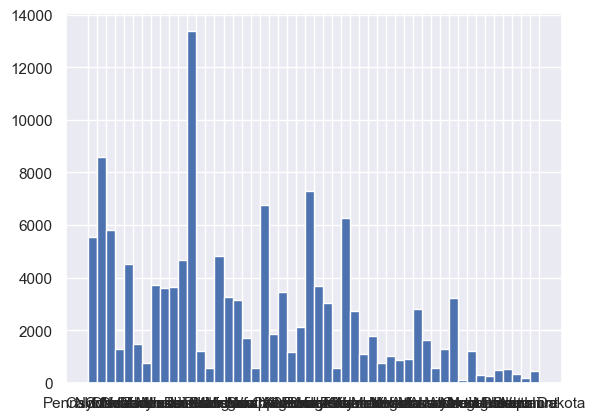

In [102]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
import seaborn as sns 

np.sort(states)
plt.hist(states, 50);

# wish i could somehow make this interactive!
# would be cool to hover over and see what state you've selected

In [103]:
states = main_clean[:,2]

In [104]:
mass = main_clean[main_clean[:,2] == 'Massachusetts']
nc = main_clean[main_clean[:,2] == 'North Carolina']
vt = main_clean[main_clean[:,2] == 'Vermont']
print(vt.shape)
mass.shape #oof, that's a lot of incidents

(228, 8)


(3233, 8)

In [105]:
# sorry for the darkness of this all. just something that matters to me
# and has affected me personally. a story for another time.
mass_killing = main_clean[main_clean[:,4] > 10]

<Axes: >

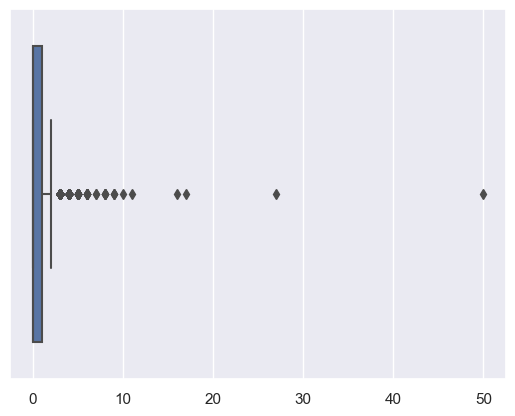

In [106]:
sns.boxplot(x=main_clean[:,4]) # box plot of victims killed in a shooting

In [107]:
main_clean = pd.DataFrame(main_clean)

# converted to DataFrame so i could get matplotlib to work below
# but when i do so, i keep losing my column labels D-:

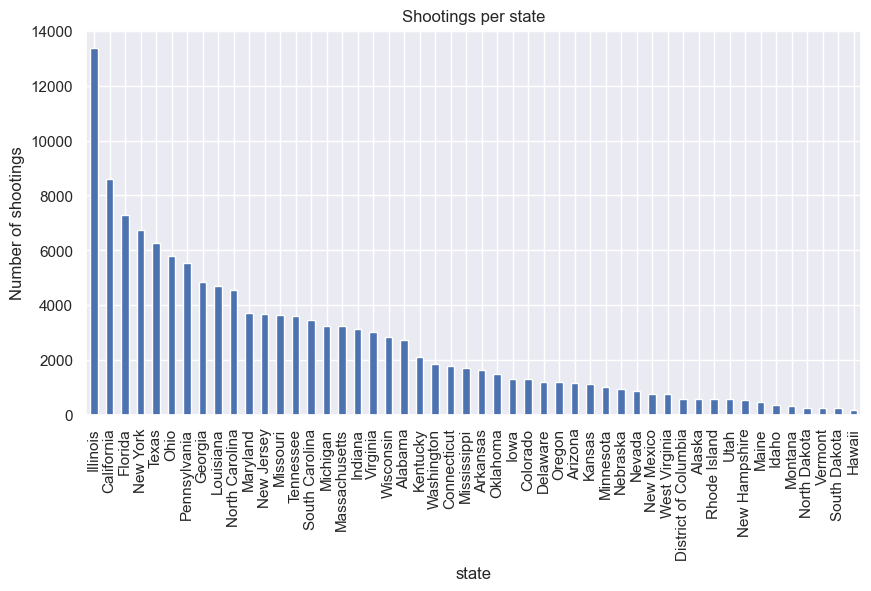

In [108]:
main_clean[2].value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Shootings per state")
plt.ylabel('Number of shootings')
plt.xlabel('state');

In [109]:
main_clean[6]

0        -79.8559
1        -118.333
2        -82.1377
3        -104.802
4        -79.9569
           ...   
130866   -117.235
130867   -93.0836
130868   -90.0442
130869    -95.611
130870   -69.7691
Name: 6, Length: 130871, dtype: object

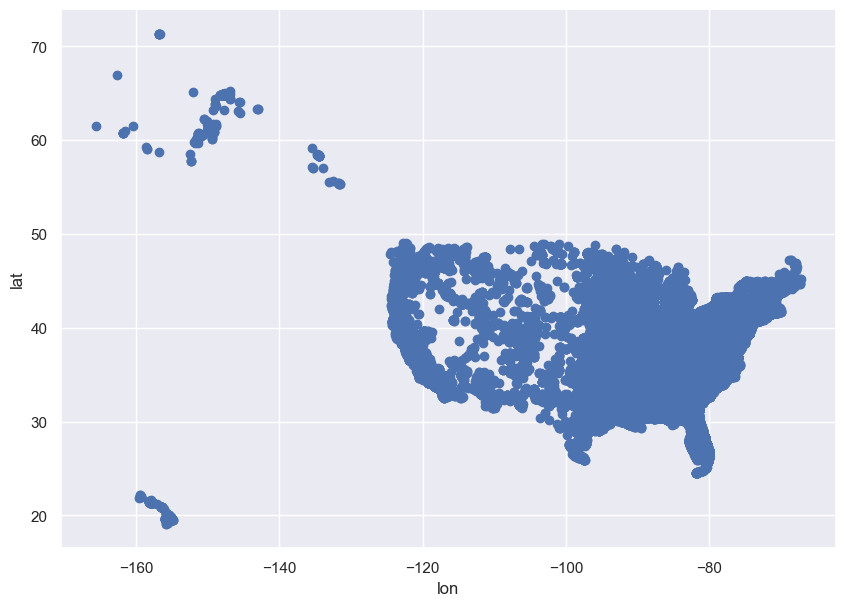

In [110]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(main_clean[6], main_clean[5])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
plt.show()

In [111]:
mass = pd.DataFrame(mass)
nc = pd.DataFrame(nc)
vt = pd.DataFrame(vt)

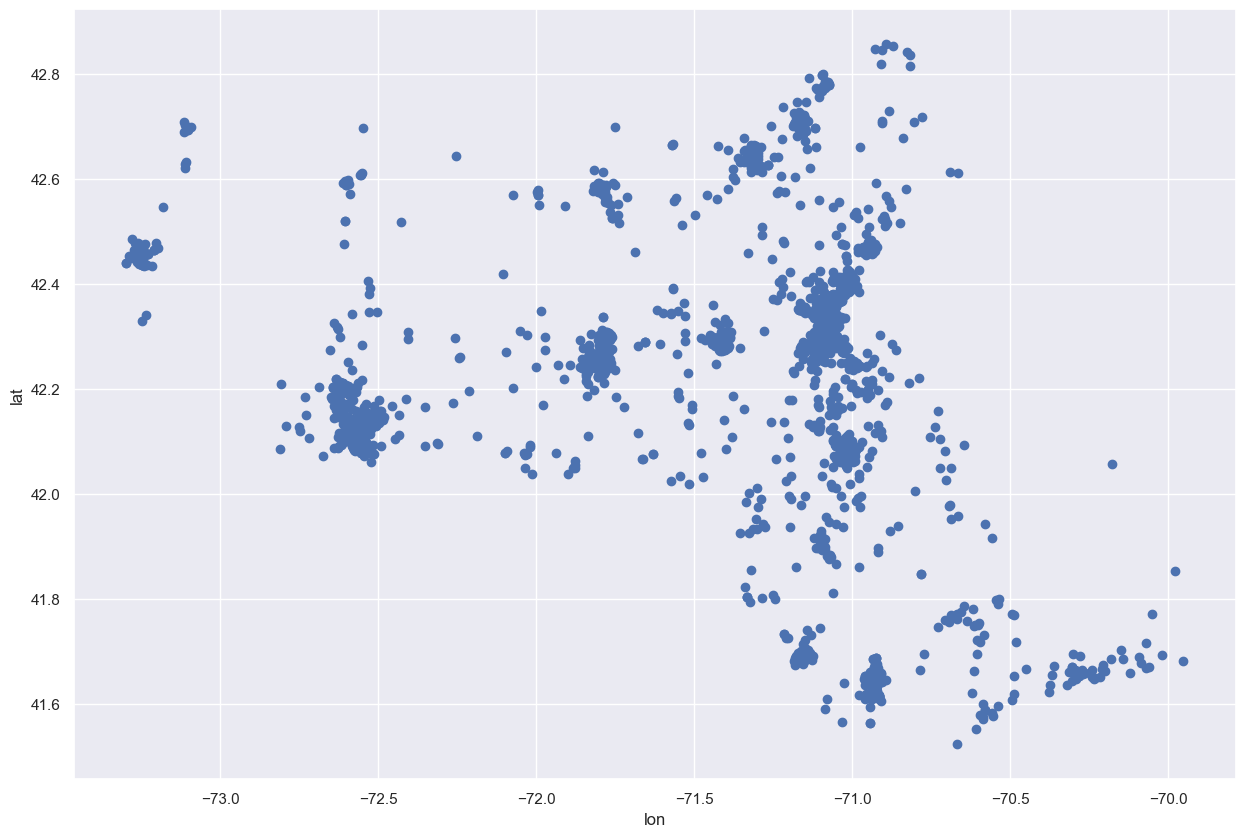

In [112]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(mass[6], mass[5])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
plt.show()

# interesting. also terrifying + sad.

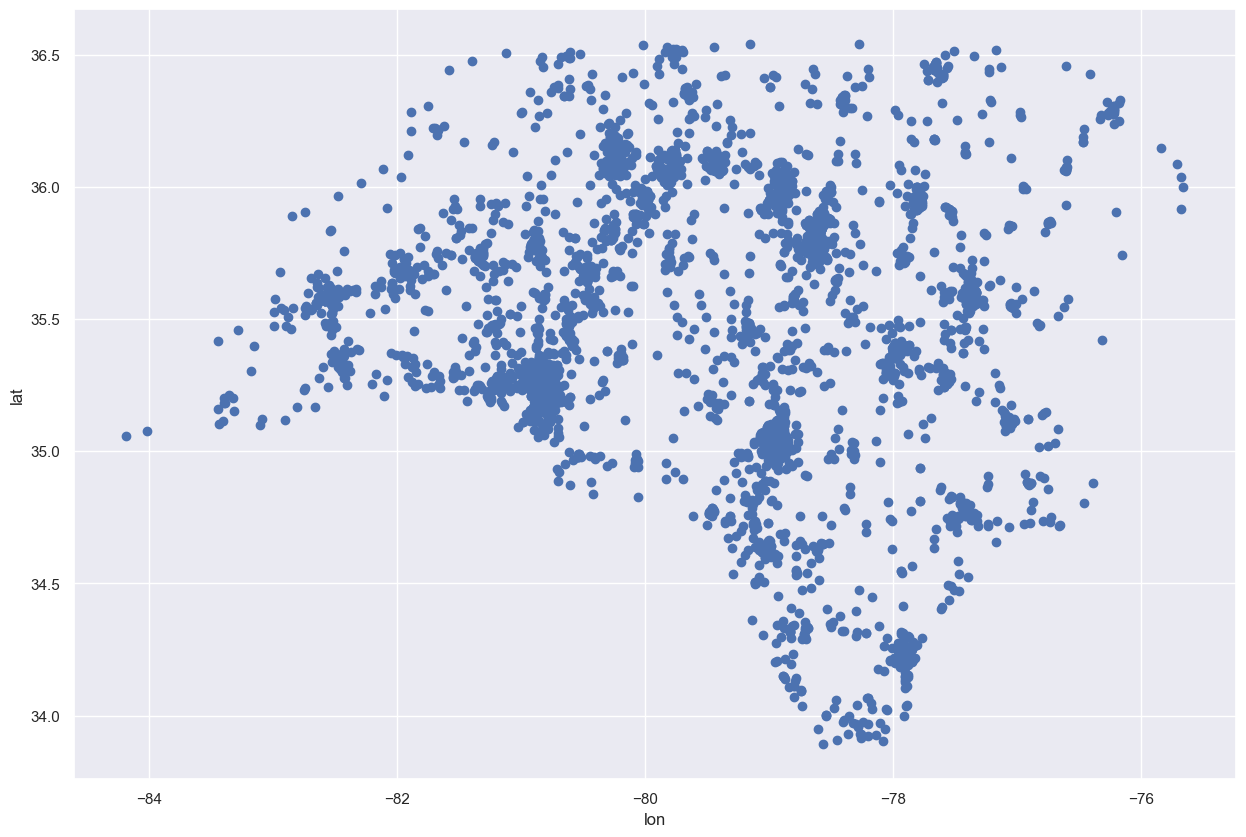

In [113]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(nc[6], nc[5])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
plt.show()

In [114]:
# whoa! i know i should have expected the plot to look like this but like...
# it worked! heh!

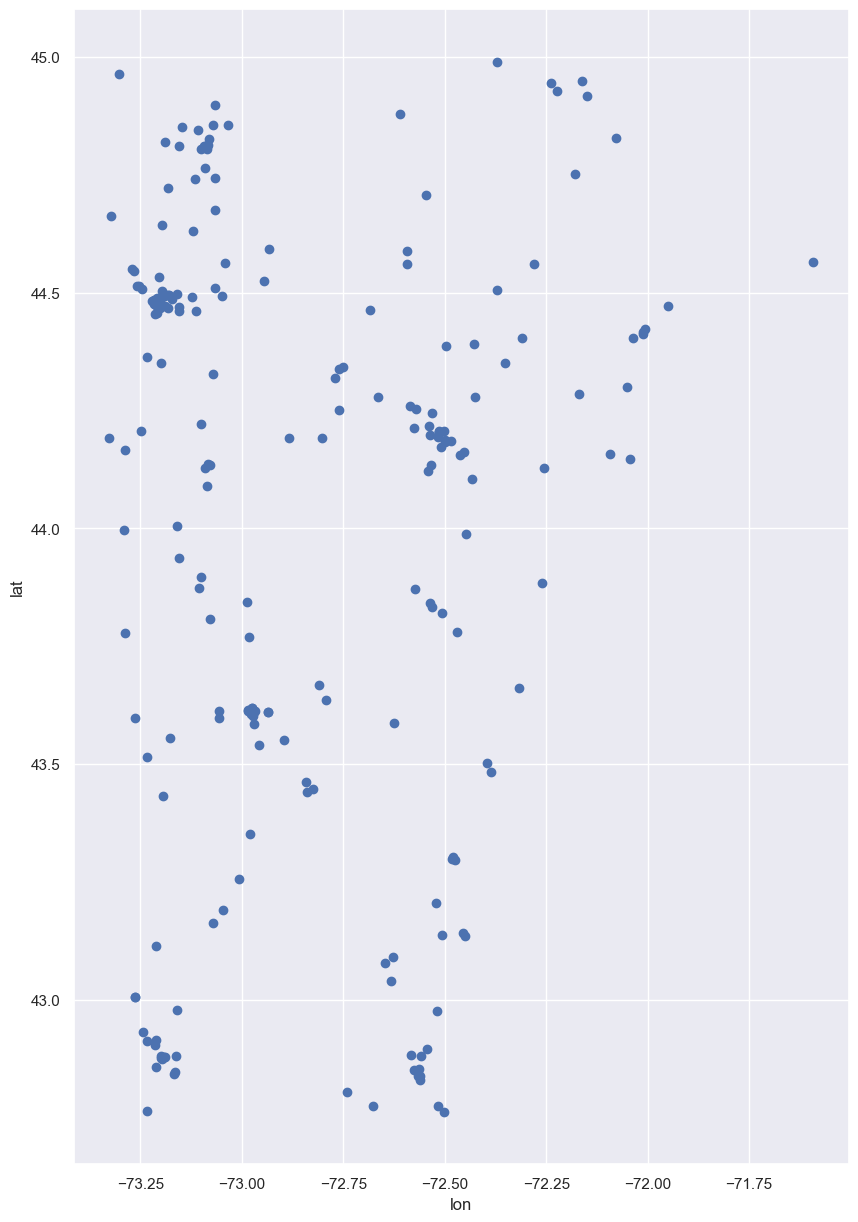

In [115]:
fig, ax = plt.subplots(figsize=(10,15))
ax.scatter(vt[6], vt[5])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
plt.show()

In [116]:
# my friend Marlon came over who lives in Brattleboro VT, so we looked
# at the shooting data for it. he was pretty surprised.

vt_numpy = np.array(vt)
vt_numpy[vt_numpy[:,3] == 'Brattleboro']

array([[121955, '2014-04-04', 'Vermont', 'Brattleboro', 1, 42.8802,
        -72.5589, '0::35'],
       [445461, '2015-11-09', 'Vermont', 'Brattleboro', 1, 42.8941,
        -72.5437, '0::35||1::39'],
       [487121, '2016-01-13', 'Vermont', 'Brattleboro', 0, 42.8511,
        -72.5761, '0::36'],
       [666244, '2016-09-22', 'Vermont', 'Brattleboro', 0, 42.8297,
        -72.5618, '0::50'],
       [825528, '2016-10-05', 'Vermont', 'Brattleboro', 0, 42.8378,
        -72.5656, '0::40'],
       [805207, '2017-03-28', 'Vermont', 'Brattleboro', 0, 42.8374,
        -72.5601, '0::36'],
       [966488, '2017-10-05', 'Vermont', 'Brattleboro', 0, 42.8522,
        -72.5629, '0::26']], dtype=object)